In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dataset/image-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle


In [ ]:

catagories = os.listdir('/content/Image dataset')
print(catagories)
path, dirs, files = next(os.walk("/content/Image dataset"))
print(path)

In [ ]:
data=[]
for i in catagories:
    path1=os.path.join(path,i)
    label = catagories.index(i)
    for img in os.listdir(path1):
        imgpath = os.path.join(path1,img)
        print(imgpath)
        img = cv2.imread(imgpath,0)
        try:
          img = cv2.resize(img,(50,50))
          image = np.array(img).flatten()
          data.append([image,label])
        except Exception as e:
           pass

print(len(data))       

In [ ]:
random.shuffle(data)
features = []
labels = []
for feature,label in data:
    features.append(feature)
    labels.append(label)
    



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 101)

In [ ]:
model = SVC(C=1, kernel='poly',gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acccuracy = model.score(X_test, y_test)
print("prediction :",prediction)
print("Accuracy :",acccuracy)

prediction : [0 1 1 2 0 1 1 0 2 1 1 1 2 0 0 0 0 2 0 0 0 2 1 2 2 2 2 0 2 1 0 0 0 0 1 0 0
 0 2 0 2 2 2 2 2 1 0 1 0 0 2]
Accuracy : 0.9803921568627451


In [ ]:
pick = open('/content/model.sav','wb')
pickle.dump(model,pick)
pick.close()


In [ ]:
print(X_test)

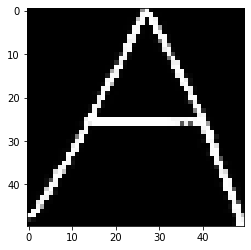

prediction : A


In [ ]:
image = X_test[0].reshape(50,50)
plt.imshow(image,cmap='gray')
plt.show()
print("prediction :",catagories[prediction[0]])

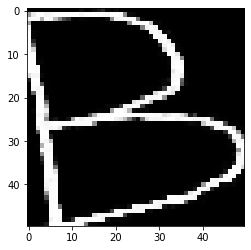

prediction : B


In [ ]:
image = X_test[3].reshape(50,50)
plt.imshow(image,cmap='gray')
plt.show()
print("prediction :",catagories[prediction[3]])

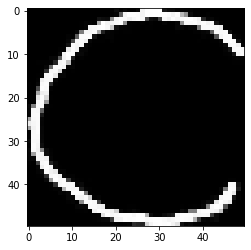

prediction : C


In [ ]:
image = X_test[2].reshape(50,50)
plt.imshow(image,cmap='gray')
plt.show()
print("prediction :",catagories[prediction[2]])

In [ ]:
image = X_test[6].reshape(50,50)
plt.imshow(image,cmap='gray')
plt.show()
print("prediction :",catagories[prediction[6]])

In [ ]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

prediction : B


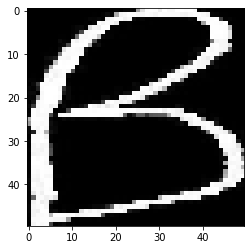

In [ ]:
imgpath = "/content/drive/MyDrive/dataset/B.jpg"
img = cv2.imread(imgpath,0)

img = cv2.resize(img,(50,50))
plt.imshow(img,cmap='gray')
image = np.array(img).flatten()
prediction = model.predict([image])
print("prediction :",catagories[prediction[0]])



prediction : C


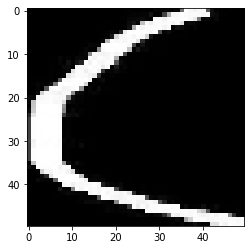

In [ ]:
imgpath = "/content/drive/MyDrive/dataset/C.jpg"
img = cv2.imread(imgpath,0)

img = cv2.resize(img,(50,50))
plt.imshow(img,cmap='gray')
image = np.array(img).flatten()
prediction = model.predict([image])
print("prediction :",catagories[prediction[0]])

prediction : C


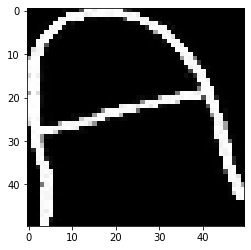

In [ ]:
imgpath = "/content/drive/MyDrive/dataset/A.jpg"
img = cv2.imread(imgpath,0)

img = cv2.resize(img,(50,50))
plt.imshow(img,cmap='gray')
image = np.array(img).flatten()
prediction = model.predict([image])
print("prediction :",catagories[prediction[0]])